## The model 6 about Metrics for Classification model and Multiclassification

## homework by matrix error and metrics for classification

In [108]:
import pandas as pd
import numpy as np

In [109]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [110]:
from sklearn.metrics import confusion_matrix, \
                            recall_score, \
                            precision_score, \
                            accuracy_score, \
                            f1_score

In [111]:
titanic = pd.read_csv('train.csv')
print('\nForm:', titanic.shape)
print('\nName_features:', titanic.columns)
print('\nType:', titanic.dtypes)
titanic.head(10)


Form: (891, 12)

Name_features: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Type: PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Check data for NULL values

In [112]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [113]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [114]:
def preprocess_data(data):
    # fill all fills with none in column age
    mean_age_sex = (data
                    .groupby('Sex')
                    .agg({'Age': 'mean'}))

    mean_age_condition = np.where(data['Age'].isnull() == True,
                                  mean_age_sex.loc[data['Sex'], 'Age'],
                                  data['Age'])
    data['Age'] = mean_age_condition
    
    # fill all with none columns cabin embarked
    data.fillna('U', inplace=True)
    data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
    data['Embarked'].replace(["U", "S", "C", "Q" ], [0, 1, 2, 3], inplace=True)
    
    return data

In [115]:
titanic = preprocess_data(titanic)

In [116]:
y = titanic['Survived']
titanic.drop(['Survived'], axis=1, inplace=True)

In [117]:
x_train, x_valid, y_train, y_valid = train_test_split(titanic, y, random_state=17)

In [118]:
x_train.shape, x_valid.shape

((668, 7), (223, 7))

In [119]:
y_train.value_counts()

0    418
1    250
Name: Survived, dtype: int64

In [120]:
mean_fare_pclass_3 = (x_valid
                    .query('Pclass == 3')
                    ['Fare'].mean())

In [121]:
y_test = pd.read_csv('gender_submission.csv')
x_test = preprocess_data(pd.read_csv('test.csv'))

x_test['Fare'].replace('U', mean_fare_pclass_3, inplace=True)

In [122]:
y_test.drop('PassengerId', axis=1, inplace=True)

In [123]:
y_test.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [124]:
from sklearn.linear_model import LogisticRegressionCV

In [125]:
knn_cls = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
naive_cls = GaussianNB().fit(x_train, y_train)
tree_cls = DecisionTreeClassifier().fit(x_train, y_train)


log_cls = LogisticRegression(max_iter=200).fit(x_train, y_train)

In [126]:
print(x_valid.shape)
print(x_valid['Sex'].unique())
print(x_valid['Embarked'].unique())
x_valid.head()

(223, 7)
[0 1]
[3 1 2]


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
890,3,0,32.0,0,0,7.7500,3
498,1,1,25.0,1,2,151.5500,1
664,3,0,20.0,1,0,7.9250,1
261,3,0,3.0,4,2,31.3875,1
716,1,1,38.0,0,0,227.5250,2


In [127]:
x_test.query('Fare == "U"')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [128]:
(x_valid
 .query('Pclass == 3')
 ['Fare'].mean())

15.132541322314049

In [129]:
print(x_test.shape)
print(x_test['Sex'].unique())
print(x_test['Embarked'].unique())
print(x_test['Fare'].unique())

(418, 7)
[0 1]
[3 1 2]
[  7.8292       7.           9.6875       8.6625      12.2875
   9.225        7.6292      29.           7.2292      24.15
   7.8958      26.          82.2667      61.175       27.7208
  12.35         7.225        7.925       59.4          3.1708
  31.6833      61.3792     262.375       14.5         61.9792
  30.5         21.6792      31.5         20.575       23.45
  57.75         8.05         9.5         56.4958      13.4167
  26.55         7.85        13.          52.5542      29.7
   7.75        76.2917      15.9         60.          15.0333
  23.         263.          15.5792      29.125        7.65
  16.1         13.5          7.725       21.           7.8792
  42.4         28.5375     211.5         25.7         15.2458
 221.7792      10.7083      14.4542      13.9          7.775
  52.           7.7958      78.85         7.8542      55.4417
   8.5167      22.525        7.8208       8.7125      15.0458
   7.7792      31.6792       7.2833       6.4375      16.

In [130]:
pred_knn = knn_cls.predict(x_valid)
pred_naive = naive_cls.predict(x_valid)
pred_tree = tree_cls.predict(x_valid)
pred_log = log_cls.predict(x_valid)

In [131]:
test_pred_knn = knn_cls.predict(x_test)
test_pred_naive = naive_cls.predict(x_test)
test_pred_tree = tree_cls.predict(x_test)
test_pred_log = log_cls.predict(x_test)

In [132]:
def f_score(actual, pred):
    from sklearn.metrics import confusion_matrix
    possitive, negative = confusion_matrix(actual, pred, labels=actual.unique()[::-1])
    
    def precision():
        return possitive[0] / (possitive[0] + possitive[1])
    def recall():
        return possitive[0] / (possitive[0] + negative[0])
    
    f_score = 2 * ((precision()*recall()) / (precision()+recall()))
    return f_score
    

In [133]:
y_valid.unique()[::-1]

array([1, 0])

In [134]:
possitive, negative = confusion_matrix(y_valid, pred_knn, labels=[1, 0])
print(possitive)
print(negative)

[46 46]
[ 18 113]


In [135]:
f_score(y_valid, pred_knn)

0.5897435897435898

In [136]:
f1_score(y_valid, pred_knn)

0.5897435897435898

In [137]:
confusion_matrix(y_valid, pred_knn, labels=[1, 0])

array([[ 46,  46],
       [ 18, 113]])

In [138]:
# matrix confusion for K-nearest neighbor 
print(confusion_matrix(y_valid, pred_knn, labels=[1, 0]))
print('valid:')
print(f'knn precision: {precision_score(y_valid, pred_knn)}')
print(f'knn recall: {recall_score(y_valid, pred_knn)}')
print(f'knn accuracy: {accuracy_score(y_valid, pred_knn)}')

print('\ntest:')
# print(confusion_matrix(y_test, pred_knn))
print(f'knn test recall: {recall_score(y_test, test_pred_knn)}')
print(f'knn test accuracy: {accuracy_score(y_test, test_pred_knn)}')

[[ 46  46]
 [ 18 113]]
valid:
knn precision: 0.71875
knn recall: 0.5
knn accuracy: 0.7130044843049327

test:
knn test recall: 0.3684210526315789
knn test accuracy: 0.6172248803827751


In [139]:
# matrix confusion for naive bayse classifier
print('valid:')
print(confusion_matrix(y_valid, pred_naive, labels=[1, 0]))
print(f'naive recall: {recall_score(y_valid, pred_naive)}')
print(f'naive accuracy: {accuracy_score(y_valid, pred_naive)}')

print('\ntest:')
print(confusion_matrix(y_test, test_pred_naive, labels=[1, 0]))
print(f'naive test recall: {recall_score(y_test, test_pred_naive)}')
print(f'naive test precision: {precision_score(y_test, test_pred_naive)}')
print(f'naive test accuracy: {accuracy_score(y_test, test_pred_naive)}')

valid:
[[ 65  27]
 [ 20 111]]
naive recall: 0.7065217391304348
naive accuracy: 0.7892376681614349

test:
[[146   6]
 [ 25 241]]
naive test recall: 0.9605263157894737
naive test precision: 0.8538011695906432
naive test accuracy: 0.9258373205741627


In [140]:
# matrix confusion for decision tree
print('valid:')
print(confusion_matrix(y_valid, pred_tree, labels=[1, 0]))
print(f'tree recall: {recall_score(y_valid, pred_tree)}')
print(f'tree accuracy: {accuracy_score(y_valid, pred_tree)}')

print('\ntest:')
print(confusion_matrix(y_test, test_pred_tree, labels=[1, 0]))
print(f'tree test recall: {recall_score(y_test, test_pred_tree)}')
print(f'tree test accuracy: {accuracy_score(y_test, test_pred_tree)}')

valid:
[[ 67  25]
 [ 20 111]]
tree recall: 0.7282608695652174
tree accuracy: 0.7982062780269058

test:
[[102  50]
 [ 52 214]]
tree test recall: 0.6710526315789473
tree test accuracy: 0.7559808612440191


In [141]:
# matrix confusion for logistic regression
print('valid:')
print(confusion_matrix(y_valid, pred_tree, labels=[1, 0]))
print(f'log recall: {recall_score(y_valid, pred_log)}')
print(f'log accuracy: {accuracy_score(y_valid, pred_log)}')

print('\ntest:')
print(confusion_matrix(y_test, test_pred_log, labels=[1, 0]))
print(f'log test recall: {recall_score(y_test, test_pred_log)}')
print(f'log test precision: {precision_score(y_test, test_pred_log)}')
print(f'log test accuracy: {accuracy_score(y_test, test_pred_log)}')

valid:
[[ 67  25]
 [ 20 111]]
log recall: 0.6956521739130435
log accuracy: 0.7937219730941704

test:
[[139  13]
 [ 13 253]]
log test recall: 0.9144736842105263
log test precision: 0.9144736842105263
log test accuracy: 0.937799043062201


## homework two connected with metrics about F-score, AUC-ROC and logross

In [142]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [143]:
# matrix confusion for K-nearest neighbor 
print(confusion_matrix(y_valid, pred_knn, labels=[1, 0]))
print('valid:')
print(f'knn precision: {precision_score(y_valid, pred_knn)}')
print(f'knn recall: {recall_score(y_valid, pred_knn)}')
print(f'knn accuracy: {accuracy_score(y_valid, pred_knn)}')

print('\ntest:')
# print(confusion_matrix(y_test, pred_knn))
print(f'knn test recall: {recall_score(y_test, test_pred_knn)}')
print(f'knn test accuracy: {accuracy_score(y_test, test_pred_knn)}')

[[ 46  46]
 [ 18 113]]
valid:
knn precision: 0.71875
knn recall: 0.5
knn accuracy: 0.7130044843049327

test:
knn test recall: 0.3684210526315789
knn test accuracy: 0.6172248803827751


In [144]:
print(classification_report(y_valid, pred_knn, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.72      0.50      0.59        92
           0       0.71      0.86      0.78       131

    accuracy                           0.71       223
   macro avg       0.71      0.68      0.68       223
weighted avg       0.71      0.71      0.70       223



In [145]:
# cool to way to use this method for calculate based metrics in classification
precision_recall_fscore_support(y_valid, pred_knn, labels=[1, 0])

(array([0.71875   , 0.71069182]),
 array([0.5       , 0.86259542]),
 array([0.58974359, 0.77931034]),
 array([ 92, 131]))

In [146]:
# calculate all based metrics for log
print(classification_report(y_valid, pred_log, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.78      0.70      0.74        92
           0       0.80      0.86      0.83       131

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [147]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [148]:
skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

In [149]:
cs = np.logspace(-1, 2, num=500)

In [150]:
model_log_cv = LogisticRegressionCV(Cs=c, cv=skf, scoring='roc_auc').fit(x_train, y_train)

/home/stynic/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/stynic/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [151]:
pred_log_cv = model_log_cv.predict(x_valid)

In [152]:
# calculate all based metrics for log
print(classification_report(y_valid, pred_log, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.78      0.70      0.74        92
           0       0.80      0.86      0.83       131

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [153]:
print(classification_report(y_valid, pred_log_cv, labels=[1, 0]))

              precision    recall  f1-score   support

           1       0.78      0.70      0.74        92
           0       0.80      0.86      0.83       131

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [154]:
import matplotlib.pyplot as plt

In [167]:
model_log_cv.scores_[1]

array([[0.91916667, 0.91916667, 0.91940476, ..., 0.92297619, 0.92297619,
        0.92297619],
       [0.8475    , 0.8475    , 0.8475    , ..., 0.85202381, 0.85202381,
        0.85202381],
       [0.87857143, 0.87857143, 0.87904762, ..., 0.87809524, 0.87809524,
        0.87809524],
       [0.7246988 , 0.7246988 , 0.7246988 , ..., 0.72927711, 0.72927711,
        0.72927711],
       [0.86626506, 0.86650602, 0.86650602, ..., 0.86506024, 0.86506024,
        0.86506024]])

In [191]:
model_log_cv.scores_[1].reshape(-1, 5).mean(axis=1)

(500,)

In [196]:
model_log_cv.C_

array([8.50863158])

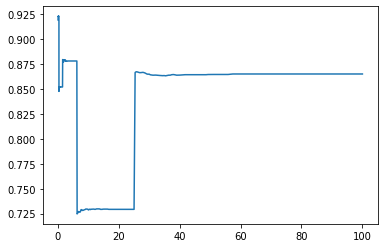

In [198]:
plt.plot(cs, model_log_cv.scores_[1].reshape(-1, 5).mean(axis=1))

In [2]:
# Work with multyclassification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_iris

In [44]:
# look at the binary classification for one
iris_data = load_iris()

features_binary = iris_data['data'][:100]
target_binary = iris_data['target'][:100]

x_train, x_valid, y_train, y_valid = train_test_split(features_binary, target_binary, random_state=0)

# train Logistic regression
log_cls_model = LogisticRegression(solver='lbfgs', random_state=0).fit(x_train, y_train)
pred_log = log_cls_model.predict(x_valid)
print('Accuracy:', accuracy_score(y_valid, pred_log))

Accuracy: 1.0


In [45]:
log_cls_model.predict([[.5, 0.2, 0.5, 0.2]])

array([0])

In [48]:
log_cls_model.predict_proba([[.5, .5, .5, .5]])

array([[9.98348945e-01, 1.65101425e-03, 4.02718428e-08]])

In [47]:
# look at the multi-classification for one
iris_data = load_iris()

features_binary = iris_data['data']
target_binary = iris_data['target']

x_train, x_valid, y_train, y_valid = train_test_split(features_binary, target_binary, random_state=0)

# train Logistic regression
log_cls_model = LogisticRegression(random_state=0).fit(x_train, y_train)
pred_log = log_cls_model.predict(x_valid)
print('Accuracy:', accuracy_score(y_valid, pred_log))

Accuracy: 0.9736842105263158


/home/stynic/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
load_iris().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## homework for multi-classification

In [105]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
import numpy as np

In [72]:
X = pd.DataFrame(load_wine()['data']).iloc[:, [9, 11, 12]]
y = load_wine()['target']

In [73]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, random_state=17)

In [74]:
scv = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

In [117]:
# train logistic regression
log_cls_model = LogisticRegression(random_state=17, multi_class='ovr')
# traind SVC
svc_model = SVC(random_state=17, decision_function_shape='ovo')

In [118]:
test_log_cv = cross_val_score(log_cls_model, x_train, y_train, cv=scv)
print('log test:', test_log_cv)
print('log test mean:', test_log_cv.mean())

print('\n')

test_svc_cv = cross_val_score(svc_model, x_train, y_train, cv=scv)
print('svc test:', test_svc_cv)
print('svc test mean:', test_svc_cv.mean())

log test: [0.96296296 0.85185185 0.92592593 0.92307692 0.88461538]
log test mean: 0.9096866096866097


svc test: [0.7037037  0.59259259 0.7037037  0.73076923 0.73076923]
svc test mean: 0.6923076923076923


In [119]:
valid_log_cv = cross_val_score(log_cls_model, x_valid, y_valid, cv=scv)
print('log valid:', valid_log_cv)
print('log valid mean:', valid_log_cv.mean())

print('\n')

valid_svc_cv = cross_val_score(svc_model, x_valid, y_valid, cv=scv)
print('svc valid:', valid_svc_cv)
print('svc valid mean:', valid_svc_cv.mean())

log valid: [1.         0.88888889 1.         1.         0.88888889]
log valid mean: 0.9555555555555555


svc valid: [0.88888889 0.66666667 0.66666667 0.77777778 0.77777778]
svc valid mean: 0.7555555555555554


In [120]:
pred_log = log_cls_model.fit(x_train, y_train).predict(x_valid)
pred_svc = svc_model.fit(x_train, y_train).predict(x_valid)

error_matrix_log = confusion_matrix(y_valid, pred_log)
print(error_matrix_log)
print(classification_report(y_valid, pred_log))

[[ 9  0  0]
 [ 0 19  0]
 [ 0  4 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.90        19
           2       1.00      0.76      0.87        17

    accuracy                           0.91        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.93      0.91      0.91        45



In [121]:
error_matrix_svc = confusion_matrix(y_valid, pred_svc)
print(error_matrix_svc)
print(classification_report(y_valid, pred_svc))

[[ 9  0  0]
 [ 0 19  0]
 [ 2 15  0]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.56      1.00      0.72        19
           2       0.00      0.00      0.00        17

    accuracy                           0.62        45
   macro avg       0.46      0.67      0.54        45
weighted avg       0.40      0.62      0.48        45



/home/stynic/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stynic/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/stynic/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
